## House Price Prediction using Linear, Ridge and Lasso regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
pd.options.display.width = 0

In [2]:
df= pd.read_csv("sydney_housing.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### DATA ANALYSIS

In [3]:
print(df.shape)

(4600, 18)


In [4]:
df= df.drop(['date'], axis =1 )

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country'],
      dtype='object')


### Continuous Variables

In [7]:
# let's find the numerical(continuous) features
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#dataframe = df.select_dtypes(include=numerics)

num_feat = []
num_feat  = [ col for col in df.columns if df[col].dtypes !='O']

print('The no. of numerical features ', len(num_feat))
print('\n', num_feat)
df[num_feat].head()

The no. of numerical features  13

 ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


### Categorical variables


In [8]:
# Let's find the categorical features 

cat_feat = [ feat for feat in df.columns if df[feat].dtypes == 'O']
print("The number of categorical features", len(cat_feat))

df[cat_feat].head()

The number of categorical features 4


,street,city,statezip,country
0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,709 W Blaine St,Seattle,WA 98119,USA
2,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,857 170th Pl NE,Bellevue,WA 98008,USA
4,9105 170th Ave NE,Redmond,WA 98052,USA


In [9]:
df['country'].unique()

array(['USA'], dtype=object)

#### 1.We can drop the feature 'country' as it  has only one unique value 'USA' in the entire dataset, its presence is not advantageous
#### 2. Secondly, the 'statezip' and the 'street' features shares relatively same information, hence keeping only one of them is beneficial (keeping 'statezip' in this case)

In [10]:
df.drop(columns=['country','street'], axis=1, inplace= True)

In [11]:
print(df['statezip'].nunique())
print("\n", df['price'].value_counts())

77

 0.0         49
300000.0    42
400000.0    31
450000.0    29
600000.0    29
            ..
586500.0     1
693000.0     1
226500.0     1
257200.0     1
256000.0     1
Name: price, Length: 1741, dtype: int64


#### It can be obsereved that the sales price is 0.0 for 49 rows, we can delete those rows as sales price cannot be 0.

In [12]:
df.drop(df[df['price'] == 0].index, inplace = True)

#Rechecking

df['price'].value_counts()

300000.0    42
400000.0    31
600000.0    29
450000.0    29
440000.0    29
            ..
586500.0     1
693000.0     1
226500.0     1
257200.0     1
256000.0     1
Name: price, Length: 1740, dtype: int64

In [13]:
# Extracting the features comprising of the year.
year_feature = [feature for feature in num_feat if 'yr' in feature or 'Year' in feature]

year_feature

['yr_built', 'yr_renovated']

### Univariate Analysis

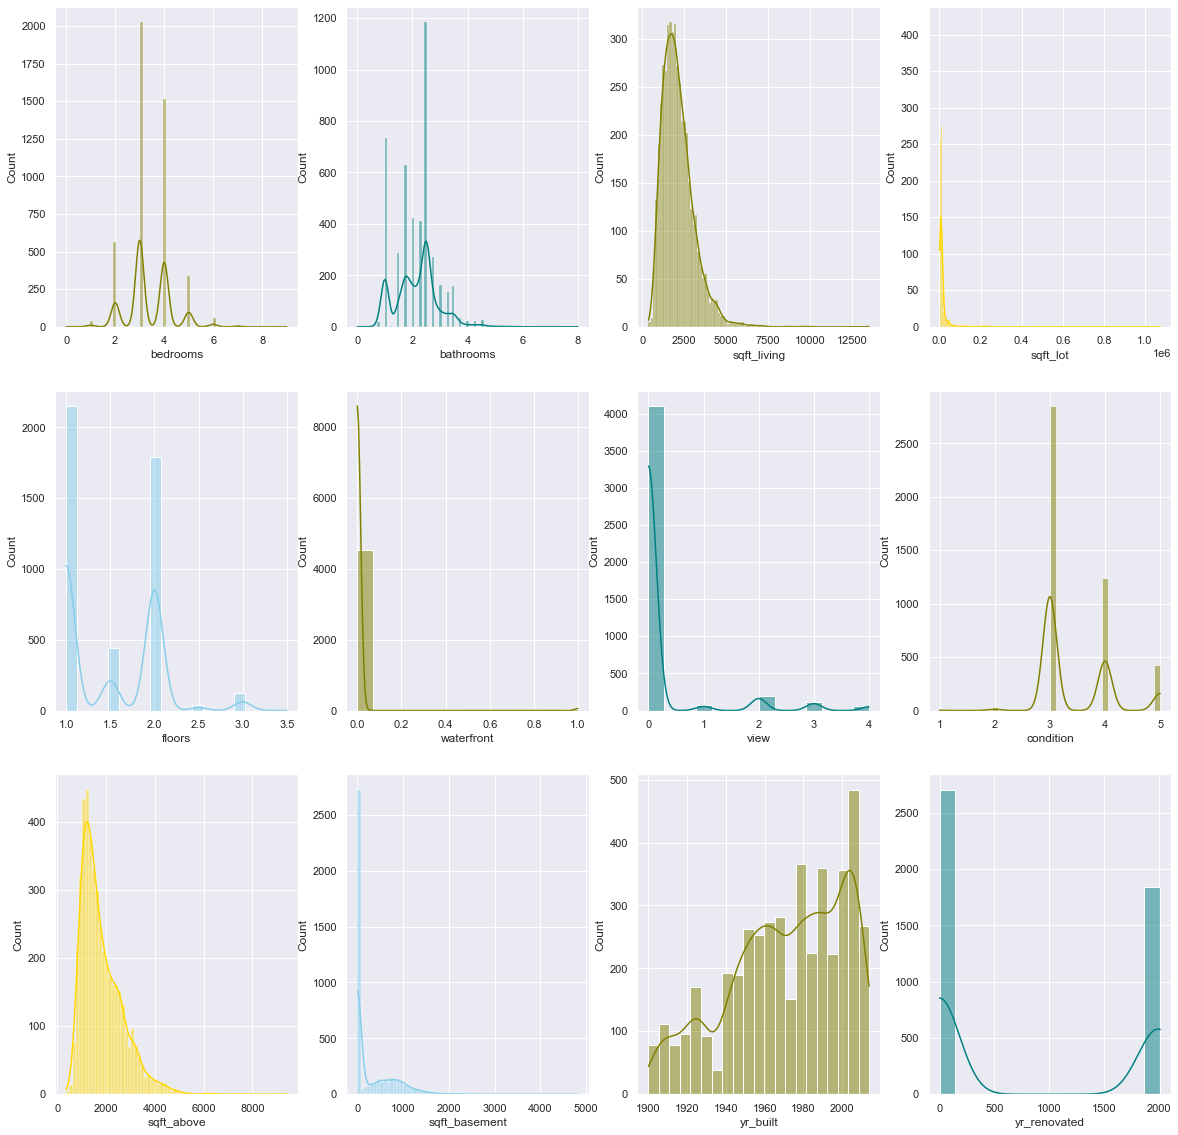

In [14]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(3, 4, figsize=(20, 20))


sns.histplot(data=df, x="bedrooms", kde=True, color="olive", ax=axs[0, 0])
sns.histplot(data=df, x="bathrooms", kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=df, x="sqft_living", kde=True, color="olive", ax=axs[0, 2])
sns.histplot(data=df, x="sqft_lot", kde=True, color="gold", ax=axs[0, 3])

sns.histplot(data=df, x="floors", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=df, x="waterfront", kde=True, color="olive", ax=axs[1, 1])
sns.histplot(data=df, x="view", kde=True, color="teal", ax=axs[1, 2])
sns.histplot(data=df, x="condition", kde=True, color="olive", ax=axs[1, 3])
sns.histplot(data=df, x="sqft_above", kde=True, color="gold", ax=axs[2, 0])

sns.histplot(data=df, x="sqft_basement", kde=True, color="skyblue", ax=axs[2, 1])
sns.histplot(data=df, x="yr_built", kde=True, color="olive", ax=axs[2, 2])
sns.histplot(data=df, x="yr_renovated", kde=True, color="teal", ax=axs[2, 3])


plt.show()


##### No feature follow any standard distribution and some of them are right skewed

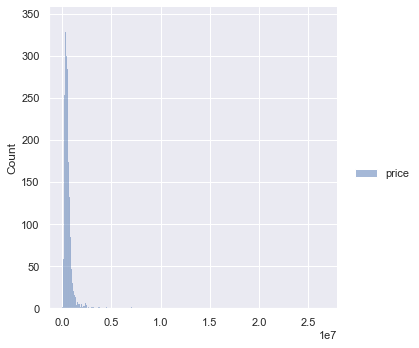

In [15]:
sns.displot([df['price']])

##### There is a possibilty of outliers in the 'price' feature which will be treated going further

### Correlation of 'price' with other features

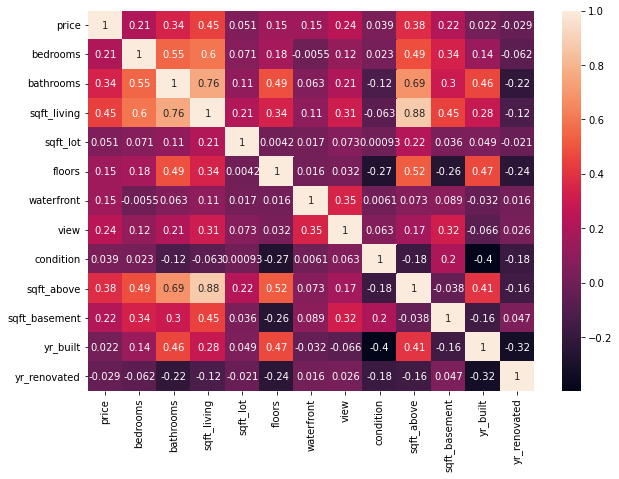

In [18]:
fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(df.corr(), ax=ax, annot= True)

In [19]:
correlation = df.corr()
print(correlation['price'].sort_values())

yr_renovated    -0.029034
yr_built         0.021757
condition        0.038892
sqft_lot         0.051347
waterfront       0.150083
floors           0.152758
bedrooms         0.210228
sqft_basement    0.217782
view             0.242587
bathrooms        0.341126
sqft_above       0.380661
sqft_living      0.445494
price            1.000000
Name: price, dtype: float64


##### It can be observed that the maximum correlation of price is with the feature 'sqft_living' with the corr coefficient 0.44

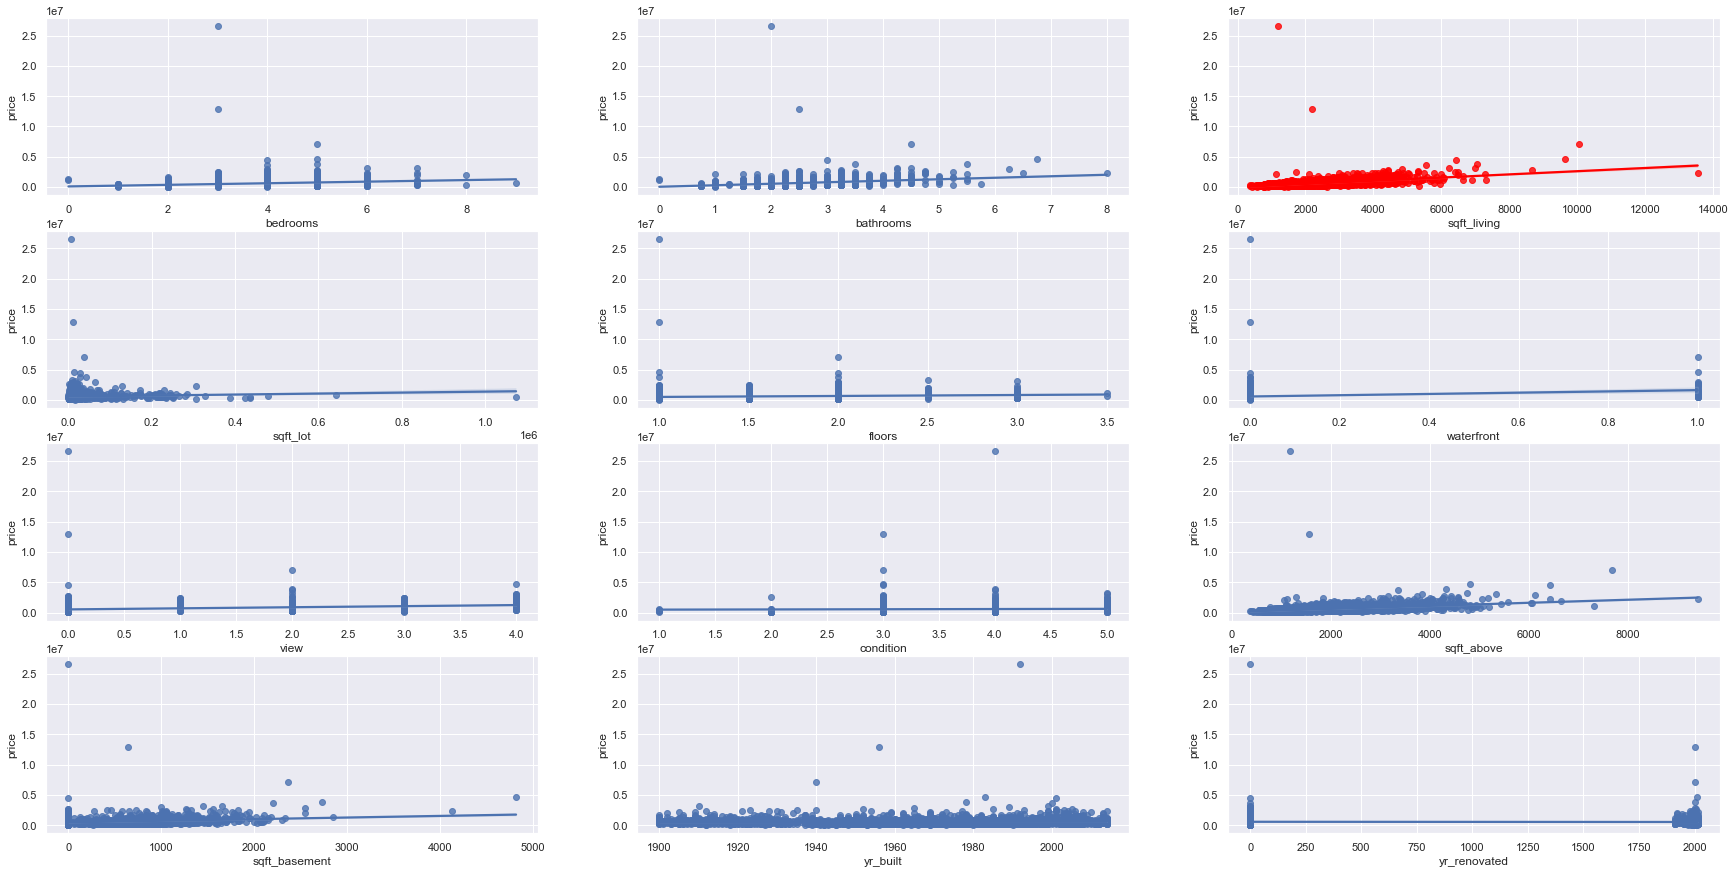

In [20]:
sns.set_theme(style= 'darkgrid')
figure, axes = plt.subplots(4,3, figsize=(30,15))

sns.regplot(x='bedrooms',y='price',data=df, ax=axes[0, 0])
sns.regplot(x='bathrooms',y='price',data=df,  ax=axes[0, 1])
sns.regplot(x='sqft_living',y='price',data=df, ax=axes[0, 2], color='red')

sns.regplot(x='sqft_lot',y='price',data=df, ax=axes[1, 0])
sns.regplot(x='floors',y='price',data=df,  ax=axes[1, 1])
sns.regplot(x='waterfront',y='price',data=df,ax=axes[1, 2])

sns.regplot(x='view',y='price',data=df, ax=axes[2, 0])
sns.regplot(x='condition',y='price',data=df, ax=axes[2, 1])
sns.regplot(x='sqft_above',y='price',data=df,ax=axes[2, 2])

sns.regplot(x='sqft_basement',y='price',data=df, ax=axes[3, 0])
sns.regplot(x='yr_built',y='price',data=df, ax=axes[3, 1])
sns.regplot(x='yr_renovated',y='price',data=df, ax=axes[3, 2])






#####  With the help of the bivariate Analysis and the relation of correltation of the fetaures  with the 'price' variable it can be observed that we can drop columns 'yr_built', 'yr_renovated'

In [21]:
df.drop(columns = ['yr_built', 'yr_renovated'], axis =1 , inplace= True)

## Dealing with outliers

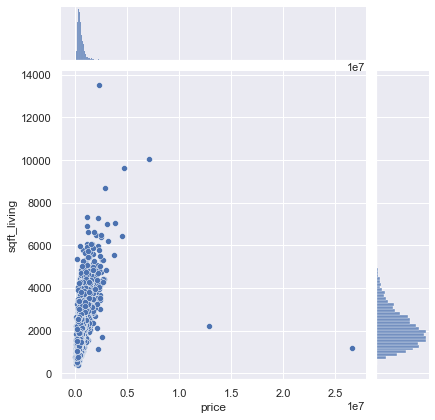

In [22]:
sns.jointplot(x='price', y='sqft_living', data = df)

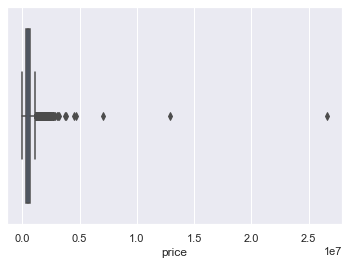

In [23]:
sns.boxplot(x=df['price'])

In [24]:
upper_outliers = df['price'].quantile(0.99)

In [25]:
df_filt = df[df['price'] < upper_outliers]

[Text(0.5, 1.0, 'After removing Outliers')]

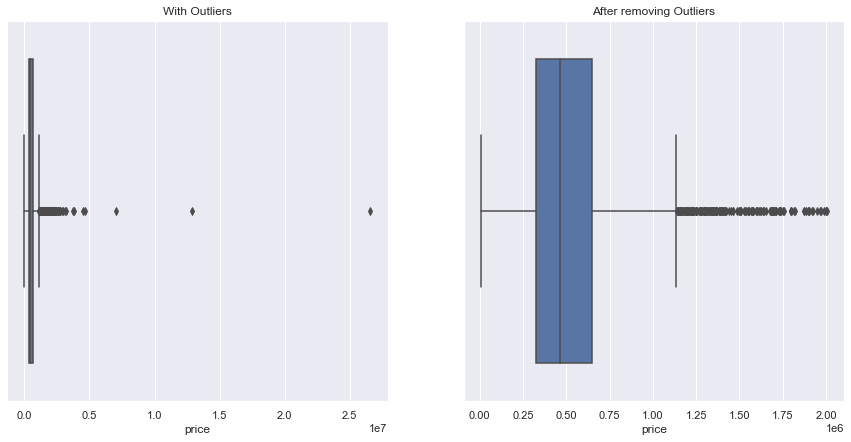

In [26]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(15, 7))



sns.boxplot(x=df['price'], ax=axs[0]).set(title='With Outliers')
sns.boxplot(x=df_filt['price'],ax=axs[1]).set(title='After removing Outliers')

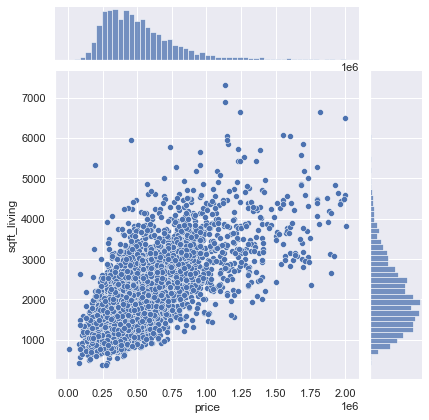

In [27]:
sns.jointplot(x='price', y='sqft_living', data = df_filt)

### Modelling 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet



In [29]:
df_filt.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,WA 98133
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,WA 98052
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,WA 98115


In [31]:
X_train,X_test,y_train,y_test = train_test_split(df_filt.drop(columns=['price']),
                                                 df_filt['price'],
                                                 test_size=0.2,
                                                random_state=1)

In [32]:
X_train.shape

(3604, 12)

In [33]:
#There are no missing values in the dataset so using imputer is of no use, still using it just for demonstration!

trans_imp = ColumnTransformer(
    [('imputer_all', SimpleImputer(strategy = 'most_frequent'),slice(0,12))], 
                              remainder='passthrough')



In [34]:

trans_encoding = ColumnTransformer([
    ('target_city_statezip', TargetEncoder(handle_unknown='ignore', smoothing=1.5, min_samples_leaf=2 ),[10,11])
],remainder='passthrough')

In [35]:
trans_scaling = ColumnTransformer([('standardization', StandardScaler(), slice(0,12))])

In [36]:
trans_regression = LinearRegression()

In [37]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [38]:
pipe = Pipeline([
                
                ('trans_encoding',trans_encoding), 
                ('trans_ `imp', trans_imp),
                 ('trans_scaling', trans_scaling),
                 ('trans_regression', trans_regression),
                ])

In [39]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trans_encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('target_city_statezip',
                                                  TargetEncoder(handle_unknown='ignore',
                                                                min_samples_leaf=2,
                                                                smoothing=1.5),
                                                  [10, 11])])),
                ('trans_ `imp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer_all',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 12, None))])),
                ('trans_scaling',
                 ColumnTransformer(transformers=[('standardization',
                                                  StandardScaler(),
                                                  slice(0, 12, None))])),
                ('trans_regression', LinearRegression())])

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3604 entries, 1805 to 237
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       3604 non-null   float64
 1   bathrooms      3604 non-null   float64
 2   sqft_living    3604 non-null   int64  
 3   sqft_lot       3604 non-null   int64  
 4   floors         3604 non-null   float64
 5   waterfront     3604 non-null   int64  
 6   view           3604 non-null   int64  
 7   condition      3604 non-null   int64  
 8   sqft_above     3604 non-null   int64  
 9   sqft_basement  3604 non-null   int64  
 10  city           3604 non-null   object 
 11  statezip       3604 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 366.0+ KB


In [41]:
pipe.named_steps

{'trans_encoding': ColumnTransformer(remainder='passthrough',
                   transformers=[('target_city_statezip',
                                  TargetEncoder(handle_unknown='ignore',
                                                min_samples_leaf=2,
                                                smoothing=1.5),
                                  [10, 11])]),
 'trans_ `imp': ColumnTransformer(remainder='passthrough',
                   transformers=[('imputer_all',
                                  SimpleImputer(strategy='most_frequent'),
                                  slice(0, 12, None))]),
 'trans_scaling': ColumnTransformer(transformers=[('standardization', StandardScaler(),
                                  slice(0, 12, None))]),
 'trans_regression': LinearRegression()}

In [42]:
y_pred = pipe.predict(X_test)

In [43]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 98659.56
Explain variance score = 0.72
Mean squared error = 22651627776.64
R2 score = 0.72


####  Cross validation for LinearRegression


In [44]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score ( pipe, X_train, y_train, scoring='r2', cv=3 ).mean()

0.7359356139515759

### ElasticNet

In [45]:
trans_Elastic = ElasticNet()
pipe_elastic = Pipeline([('trans_encoding',trans_encoding), 
                  ('trans_imp', trans_imp),
                 ('trans_scaling', trans_scaling),
                 ('trans_Elastic', trans_Elastic),
                ])

In [46]:
pipe_elastic.fit(X_train,y_train)
y_pred = pipe_elastic.predict(X_test)

In [47]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean absolute error = 101973.11
Explain variance score = 0.69
Mean squared error = 25258169176.46
R2 score = 0.69


####  Cross validation for ElasticNet


In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score ( pipe_elastic, X_train, y_train, scoring='r2', cv=3 ).mean()

0.7068705877041156

## Ridge Regression

In [49]:
trans_Ridge = Ridge()
pipe_Ridge = Pipeline([('trans_encoding',trans_encoding), 
                  ('trans_imp', trans_imp),
                 ('trans_scaling', trans_scaling),
                 ('trans_Ridge', trans_Ridge),
                ])

In [50]:
pipe_Ridge.fit(X_train,y_train)
y_pred = pipe_Ridge.predict(X_test)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 98652.21
Explain variance score = 0.72
Mean squared error = 22651986915.16
R2 score = 0.72


####  Cross validation for Ridge Regression


In [51]:
from sklearn.model_selection import cross_val_score
cross_val_score ( pipe_Ridge, X_train, y_train, scoring='r2', cv=3 ).mean()

0.7359471878915063

## Lasso Regression

In [52]:
trans_Lasso = Lasso()
pipe_Lasso = Pipeline([('trans_encoding',trans_encoding), 
                  ('trans_imp', trans_imp),
                 ('trans_scaling', trans_scaling),
                 ('trans_Lasso', trans_Lasso),
                ])

In [53]:
pipe_Lasso.fit(X_train,y_train)
y_pred = pipe_Lasso.predict(X_test)


print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 98659.46
Explain variance score = 0.72
Mean squared error = 22651608775.51
R2 score = 0.72


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4145560116351.2734, tolerance: 30758845409.84268
  model = cd_fast.enet_coordinate_descent(


####  Cross validation for Lasso Regression


In [54]:
from sklearn.model_selection import cross_val_score
cross_val_score ( pipe_Lasso, X_train, y_train, scoring='r2', cv=3 ).mean()

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2657223998233.1367, tolerance: 19277432358.286198
  model = cd_fast.enet_coordinate_descent(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2445482786098.492, tolerance: 21598320169.188084
  model = cd_fast.enet_coordinate_descent(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3207787716928.1406, tolerance: 20608333129.300987
  model = cd_fast.enet_coordinate_descent(


0.7359357861271012

##### It can be observed, considering all the Regression models ,that the R2 score is around 0.72 

### --------------------Without applying Standardization----------------------

In [55]:
pipe_without_sc = Pipeline([
                 ('trans_encoding',trans_encoding), 
                ('trans_imp', trans_imp),
                 ('trans_regression', trans_regression),
                ])

In [56]:
pipe_without_sc.fit(X_train,y_train)

Pipeline(steps=[('trans_encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('target_city_statezip',
                                                  TargetEncoder(handle_unknown='ignore',
                                                                min_samples_leaf=2,
                                                                smoothing=1.5),
                                                  [10, 11])])),
                ('trans_imp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer_all',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 12, None))])),
                ('trans_regression', LinearRegression())])

In [57]:
y_pred = pipe_without_sc.predict(X_test)


In [58]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean absolute error = 98659.56
Explain variance score = 0.72
Mean squared error = 22651627776.64
R2 score = 0.72


In [60]:
pipe_without_sc = Pipeline([
                 ('trans_encoding',trans_encoding), 
                ('trans_imp', trans_imp),
                 ('trans_Elastic', trans_Elastic),
                ])

In [61]:
pipe_without_sc.fit(X_train,y_train)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40345109771788.586, tolerance: 30758845409.84268
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('trans_encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('target_city_statezip',
                                                  TargetEncoder(handle_unknown='ignore',
                                                                min_samples_leaf=2,
                                                                smoothing=1.5),
                                                  [10, 11])])),
                ('trans_imp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer_all',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 12, None))])),
                ('trans_Elastic', ElasticNet())])

In [62]:
y_pred = pipe_without_sc.predict(X_test)

In [63]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean absolute error = 100254.87
Explain variance score = 0.71
Mean squared error = 23590128457.57
R2 score = 0.71
